# Instrucciones para examen / de Elida Peña

**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset real. Utilizaremos el «Wine Quality Dataset» disponible en UCI Machine Learning Repository. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo, así como una comprensión de las consideraciones éticas y tecnológicas en el análisis de datos.

**Contexto y Descripción del Dataset**

El «Wine Quality Dataset» contiene datos sobre las características químicas y físicas de diferentes muestras de vino tinto y blanco, así como su calidad, evaluada por expertos en una escala de 0 a 10. Este dataset es ampliamente utilizado en la investigación de modelos de clasificación y regresión debido a su naturaleza multifacética y su aplicación en la industria vinícola.

**Diccionario de Datos:**

**1. fixed acidity:** Acidez fija en g/dm³.

**2. volatile acidity:** Acidez volátil en g/dm³.

**3. citric acid**: Ácido cítrico en g/dm³.

**4. residual sugar:** Azúcar residual en g/dm³.

**5. chlorides:** Cloruros en g/dm³.

**6. free sulfur dioxide:** Dióxido de azufre libre en mg/dm³.

**7. total sulfur dioxide:** Dióxido de azufre total en mg/dm³.

**8 density:** Densidad en g/cm³.

**9. pH:** Nivel de pH.

**10. sulphates:** Sulfatos en g/dm³.

**11. alcohol:** Porcentaje de alcohol en % vol.

**12. quality:** Calidad del vino (variable objetivo, escala de 0 a 10).

**Requisitos**

**1. Limpieza de Datos:**

* **Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

* **Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

* **Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

* **Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

**2. Exploración de Datos:**

* **Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

* **Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

**3. Implementación de Modelos:**

**Modelos de Clasificación:** Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).

**Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.

**Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

**Entrega**

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

* Proceso completo de limpieza y preprocesamiento de datos.
* Visualizaciones y estadísticas descriptivas.
* Implementación y evaluación de los modelos de clasificación.
* Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

**Consideraciones Éticas y Tecnológicas**

**Consideraciones Éticas:**

* **Transparencia y Reproducibilidad:** Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.

* **Imparcialidad y Sesgo:** Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

**Consideraciones Tecnológicas:**

* **Herramientas Utilizadas:** Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.

* **Escalabilidad:** Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.

* **Optimización de Modelos:** Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.

In [127]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

Limpieza de Datos: "winequality-red.csv"
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [100]:
# Carga del dataset de winequality
path = '../data/winequality-red.csv'
red_wine = pd.read_csv(path, sep=';', header=0)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [101]:
# Inspeccionar las primeras filas del dataset
print("Primeras filas del dataset red wine:")
print(red_wine.head())

Primeras filas del dataset red wine:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1    

In [102]:
# Identificar duplicados
duplicados = red_wine.duplicated().sum()
print(f"\nNúmero de duplicados en el dataset red wine: {duplicados}")


Número de duplicados en el dataset red wine: 240


In [103]:
# Eliminar duplicados
red_wine_cleaned = red_wine.drop_duplicates()

# Confirmar la eliminación de duplicados
duplicados_post = red_wine_cleaned.duplicated().sum()
print(f"\nNúmero de duplicados después de la limpieza: {duplicados_post}")


Número de duplicados después de la limpieza: 0


In [104]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(red_wine_cleaned.isnull().sum())



Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [105]:
# Verificar la estructura
print("\nInformación del dataset red wine:")
print(red_wine.info())


Información del dataset red wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [106]:
# Verificar los tipos de datos actuales
print("Tipos de datos actuales:")
print(red_wine_cleaned.dtypes)

Tipos de datos actuales:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [107]:
# Revisar valores únicos en la columna quality
print("Valores únicos en la columna 'quality':")
print(red_wine_cleaned["quality"].unique())

Valores únicos en la columna 'quality':
[5 6 7 4 8 3]


In [108]:
# copia del df para evitar inconvenientes
red_wine_cleaned = red_wine_cleaned.copy()
# Convertir la columna 'quality' a tipo categórico
red_wine_cleaned["quality"] = red_wine_cleaned["quality"].astype("category")

# Confirmar el cambio
print("\nInformación del dataset después de convertir 'quality' a categórico:")
print(red_wine_cleaned.info())



Información del dataset después de convertir 'quality' a categórico:
<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1359 non-null   float64 
 1   volatile acidity      1359 non-null   float64 
 2   citric acid           1359 non-null   float64 
 3   residual sugar        1359 non-null   float64 
 4   chlorides             1359 non-null   float64 
 5   free sulfur dioxide   1359 non-null   float64 
 6   total sulfur dioxide  1359 non-null   float64 
 7   density               1359 non-null   float64 
 8   pH                    1359 non-null   float64 
 9   sulphates             1359 non-null   float64 
 10  alcohol               1359 non-null   float64 
 11  quality               1359 non-null   category
dtypes: category(1), float64(11)
memory usage: 128.9 KB
None


In [109]:
# Paso 1: Identificar valores faltantes
print("\nValores faltantes por columna:")
print(red_wine_cleaned.isnull().sum())


Valores faltantes por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


2. Exploración de Datos:
* Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.


In [110]:
# Paso 1: Estadísticas descriptivas
print("\nEstadísticas descriptivas de winequality-red.csv:")
print(red_wine_cleaned.describe())


Estadísticas descriptivas de winequality-red.csv:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869 

In [111]:
# Calcular moda y rango
for column in red_wine_cleaned.columns:
    if red_wine_cleaned[column].dtype != "category":  # Evitar columnas categóricas
        moda = red_wine_cleaned[column].mode()[0]
        rango = red_wine_cleaned[column].max() - red_wine_cleaned[column].min()
        print(f"{column}:")
        print(f"   Moda: {moda}")
        print(f"   Rango: {rango}")


fixed acidity:
   Moda: 7.2
   Rango: 11.3
volatile acidity:
   Moda: 0.5
   Rango: 1.46
citric acid:
   Moda: 0.0
   Rango: 1.0
residual sugar:
   Moda: 2.0
   Rango: 14.6
chlorides:
   Moda: 0.08
   Rango: 0.599
free sulfur dioxide:
   Moda: 6.0
   Rango: 71.0
total sulfur dioxide:
   Moda: 28.0
   Rango: 283.0
density:
   Moda: 0.9968
   Rango: 0.013619999999999965
pH:
   Moda: 3.3
   Rango: 1.2699999999999996
sulphates:
   Moda: 0.54
   Rango: 1.67
alcohol:
   Moda: 9.5
   Rango: 6.5


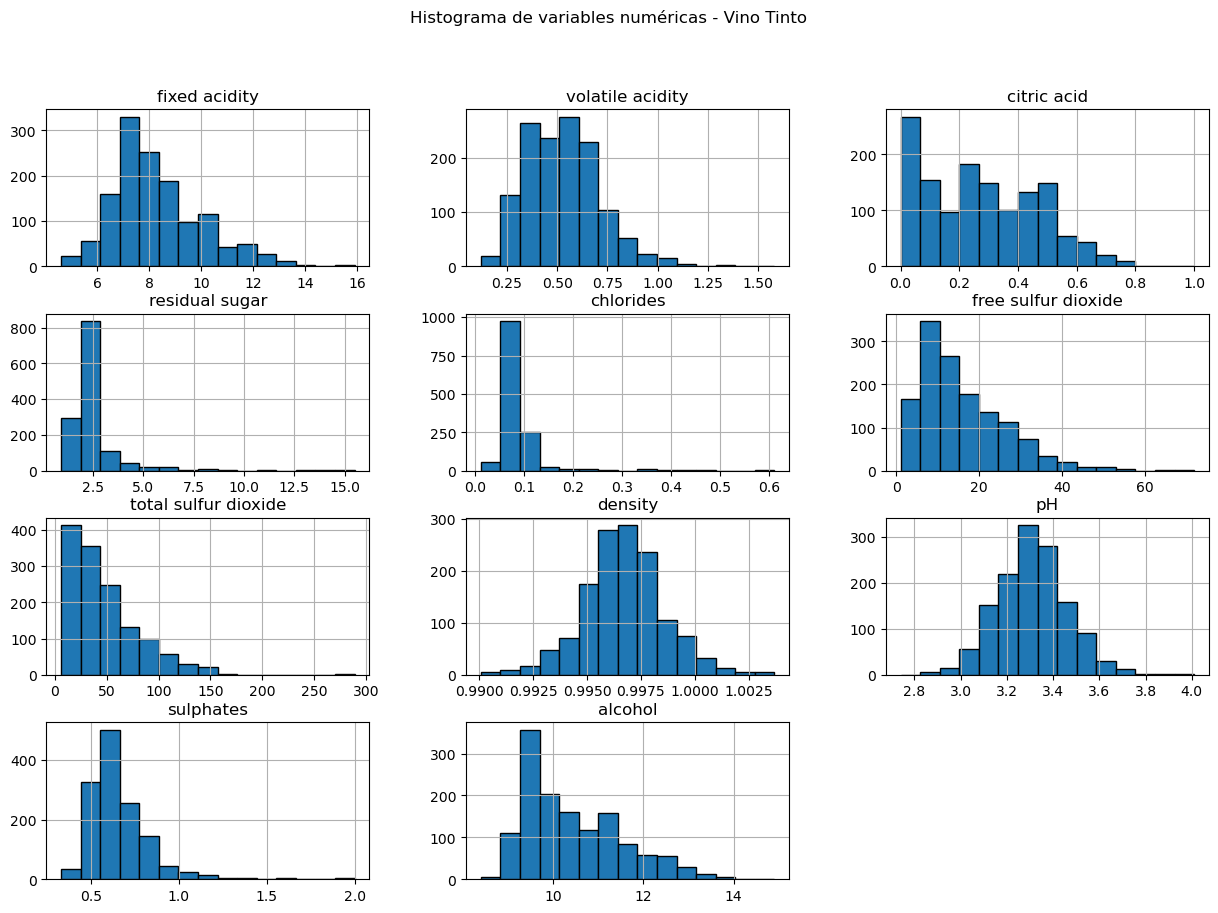

In [112]:
# Paso 2: Visualizaciones univariadas
# Histograma para todas las columnas numéricas
red_wine_cleaned.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograma de variables numéricas - Vino Tinto")
plt.show()

C:\Users\59598\AppData\Local\Temp\ipykernel_18976\3893989386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=red_wine_cleaned, palette="viridis")


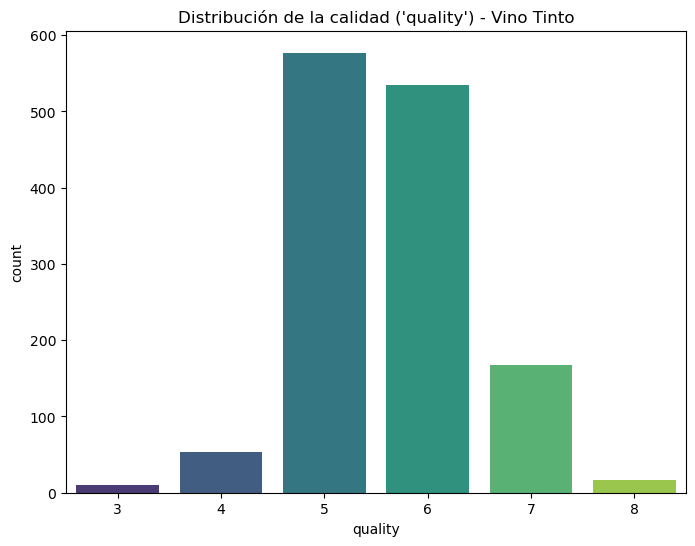

In [113]:
# Gráfico de barras para la variable 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(x="quality", data=red_wine_cleaned, palette="viridis")
plt.title("Distribución de la calidad ('quality') - Vino Tinto")
plt.show()

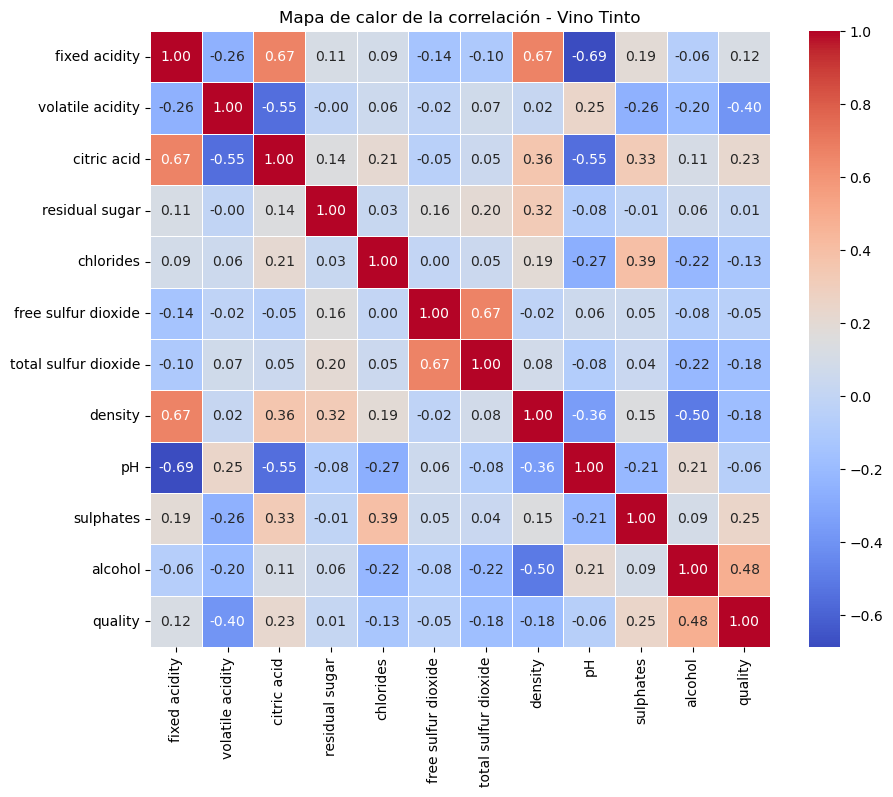

In [114]:
# Paso 3: Visualizaciones multivariadas
# Matriz de correlación y mapa de calor
correlation_matrix = red_wine_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de la correlación - Vino Tinto")
plt.show()

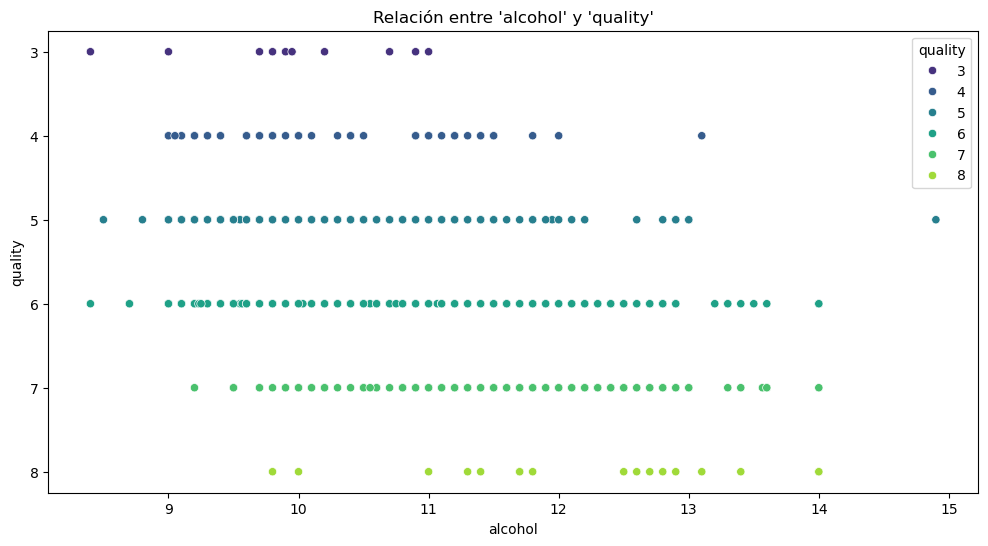

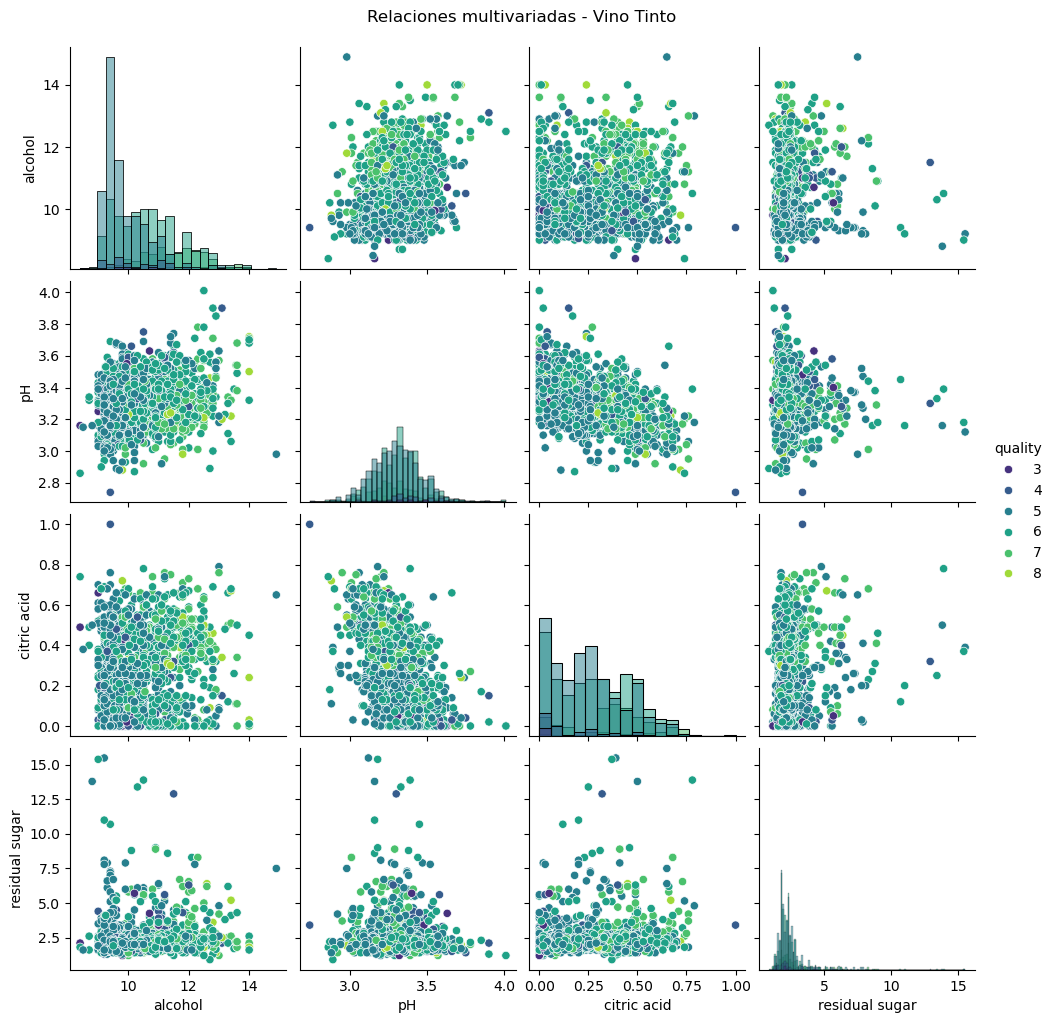

In [115]:
# Diagramas de dispersión entre algunas variables importantes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=red_wine_cleaned, x="alcohol", y="quality", hue="quality", palette="viridis")
plt.title("Relación entre 'alcohol' y 'quality'")
plt.show()

sns.pairplot(
    red_wine_cleaned,
    vars=["alcohol", "pH", "citric acid", "residual sugar"],
    hue="quality",
    palette="viridis",
    diag_kind="hist",
)
plt.suptitle("Relaciones multivariadas - Vino Tinto", y=1.02)
plt.show()

3. Implementación de Modelos:

* Modelos de Clasificación: Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).
* Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.
* Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [75]:
# Paso 1: Preparar los datos
# Definir la variable objetivo y las características predictoras
X = red_wine_cleaned.drop("quality", axis=1)  # Variables predictoras
y = red_wine_cleaned["quality"].astype("int")  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar las características (opcional pero recomendado para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [76]:
# Paso 2: Implementar Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluar Logistic Regression
print("\nEvaluación de Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))


Evaluación de Logistic Regression:
              precision    recall  f1-score   support

           3       0.05      0.33      0.09         3
           4       0.07      0.25      0.11        16
           5       0.68      0.55      0.61       173
           6       0.58      0.37      0.45       161
           7       0.38      0.48      0.42        50
           8       0.04      0.20      0.06         5

    accuracy                           0.45       408
   macro avg       0.30      0.36      0.29       408
weighted avg       0.57      0.45      0.49       408

Accuracy: 0.4534313725490196


In [77]:
# Paso 3: Implementar KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Usamos k=5 como ejemplo
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluar KNN
print("\nEvaluación de KNN:")
print(classification_report(y_test, y_pred_knn, zero_division=0 ))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Paso 4: Comparar modelos
print("\nMatriz de confusión para Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logistic))

print("\nMatriz de confusión para KNN:")
print(confusion_matrix(y_test, y_pred_knn))


Evaluación de KNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.61      0.68      0.64       173
           6       0.51      0.54      0.53       161
           7       0.54      0.44      0.48        50
           8       0.00      0.00      0.00         5

    accuracy                           0.55       408
   macro avg       0.28      0.28      0.28       408
weighted avg       0.53      0.55      0.54       408

Accuracy: 0.553921568627451

Matriz de confusión para Logistic Regression:
[[ 1  1  0  1  0  0]
 [ 5  4  5  2  0  0]
 [10 26 96 28 12  1]
 [ 3 24 39 59 24 12]
 [ 0  2  1 11 24 12]
 [ 0  0  0  0  4  1]]

Matriz de confusión para KNN:
[[  0   0   2   1   0   0]
 [  0   0  12   4   0   0]
 [  1   1 117  52   2   0]
 [  0   3  56  87  15   0]
 [  0   0   6  22  22   0]
 [  0   0   0   3   2   0]]


Limpieza de Datos: "winequality-white.csv"
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [78]:
# Carga del dataset de winequality-white
path = '../data/winequality-white.csv'
white_wine = pd.read_csv(path, sep=';', header=0)
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [79]:
# Inspeccionar las primeras filas del dataset
print("Primeras filas del dataset red wine:")
print(white_wine.head())


Primeras filas del dataset red wine:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1    

In [80]:
# Identificar duplicados
duplicados = white_wine.duplicated().sum()
print(f"\nNúmero de duplicados en el dataset red wine: {duplicados}")


Número de duplicados en el dataset red wine: 937


In [81]:
# Eliminar duplicados
white_wine_cleaned = white_wine.drop_duplicates()
# Confirmar la eliminación de duplicados
duplicados_post = white_wine_cleaned.duplicated().sum()
print(f"\nNúmero de duplicados después de la limpieza: {duplicados_post}")


Número de duplicados después de la limpieza: 0


In [82]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(white_wine_cleaned.isnull().sum())


Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [83]:
# Verificar la estructura
print("\nInformación del dataset red wine:")
print(white_wine.info())


Información del dataset red wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [84]:
# Verificar los tipos de datos actuales
print("Tipos de datos actuales:")
print(white_wine_cleaned.dtypes)

Tipos de datos actuales:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [85]:
# Revisar valores únicos en la columna quality
print("Valores únicos en la columna 'quality':")
print(white_wine_cleaned["quality"].unique())

Valores únicos en la columna 'quality':
[6 5 7 8 4 3 9]


In [ ]:
# copia del df para evitar inconvenientes
white_wine_cleaned = white_wine_cleaned.copy()

# Convertir la columna 'quality' a tipo categórico
white_wine_cleaned["quality"] = white_wine_cleaned["quality"].astype("category")


In [36]:
# Confirmar el cambio
print("\nInformación del dataset después de convertir 'quality' a categórico:")
print(white_wine_cleaned.info())


Información del dataset después de convertir 'quality' a categórico:
<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         3961 non-null   float64 
 1   volatile acidity      3961 non-null   float64 
 2   citric acid           3961 non-null   float64 
 3   residual sugar        3961 non-null   float64 
 4   chlorides             3961 non-null   float64 
 5   free sulfur dioxide   3961 non-null   float64 
 6   total sulfur dioxide  3961 non-null   float64 
 7   density               3961 non-null   float64 
 8   pH                    3961 non-null   float64 
 9   sulphates             3961 non-null   float64 
 10  alcohol               3961 non-null   float64 
 11  quality               3961 non-null   category
dtypes: category(1), float64(11)
memory usage: 375.6 KB
None


2. Exploración de Datos:

* Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [86]:
# Paso 1: Estadísticas descriptivas
print("\nEstadísticas descriptivas de winequality-white.csv:")
print(white_wine_cleaned.describe())



Estadísticas descriptivas de winequality-white.csv:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.00290

In [87]:
# Calcular moda y rango adicionales
print("\nModas y Rangos por columna:")
for column in white_wine_cleaned.columns:
    if white_wine_cleaned[column].dtype != "category":
        moda = white_wine_cleaned[column].mode()[0]
        rango = white_wine_cleaned[column].max() - white_wine_cleaned[column].min()
        print(f"{column}:")
        print(f"   Moda: {moda}")
        print(f"   Rango: {rango}")


Modas y Rangos por columna:
fixed acidity:
   Moda: 6.8
   Rango: 10.399999999999999
volatile acidity:
   Moda: 0.28
   Rango: 1.02
citric acid:
   Moda: 0.3
   Rango: 1.66
residual sugar:
   Moda: 1.2
   Rango: 65.2
chlorides:
   Moda: 0.036
   Rango: 0.33699999999999997
free sulfur dioxide:
   Moda: 29.0
   Rango: 287.0
total sulfur dioxide:
   Moda: 111.0
   Rango: 431.0
density:
   Moda: 0.992
   Rango: 0.05186999999999997
pH:
   Moda: 3.16
   Rango: 1.0999999999999996
sulphates:
   Moda: 0.5
   Rango: 0.8600000000000001
alcohol:
   Moda: 9.5
   Rango: 6.199999999999999
quality:
   Moda: 6
   Rango: 6


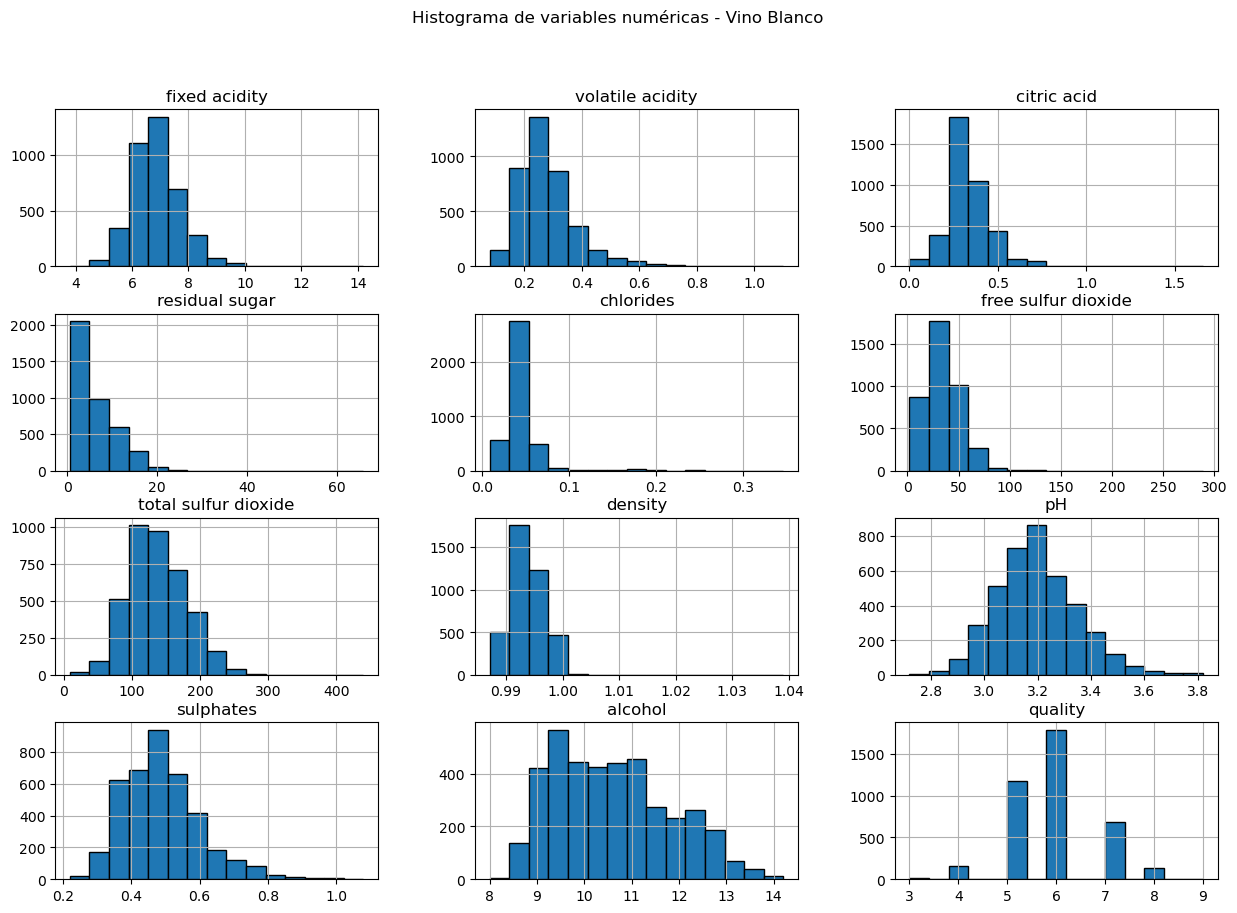

In [88]:
# Paso 2: Visualizaciones univariadas
# Histograma para todas las variables numéricas
white_wine_cleaned.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograma de variables numéricas - Vino Blanco")
plt.show()

C:\Users\59598\AppData\Local\Temp\ipykernel_18976\1365974714.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=white_wine_cleaned, palette="viridis")


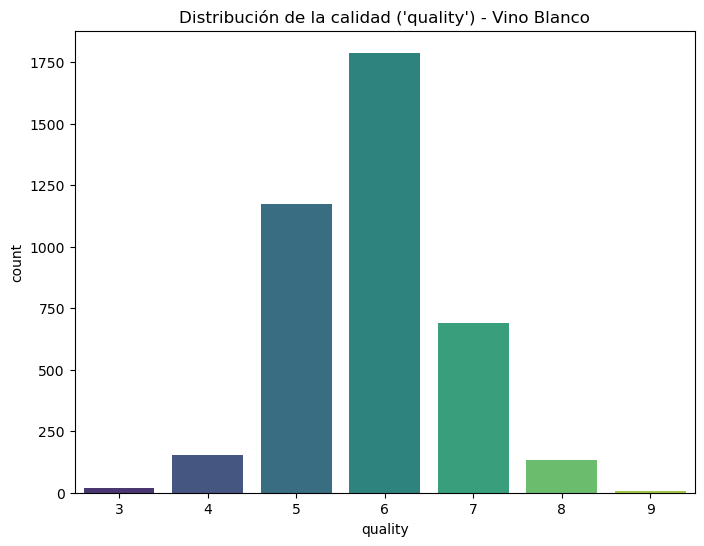

In [89]:
# Gráfico de barras para la variable 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(x="quality", data=white_wine_cleaned, palette="viridis")
plt.title("Distribución de la calidad ('quality') - Vino Blanco")
plt.show()

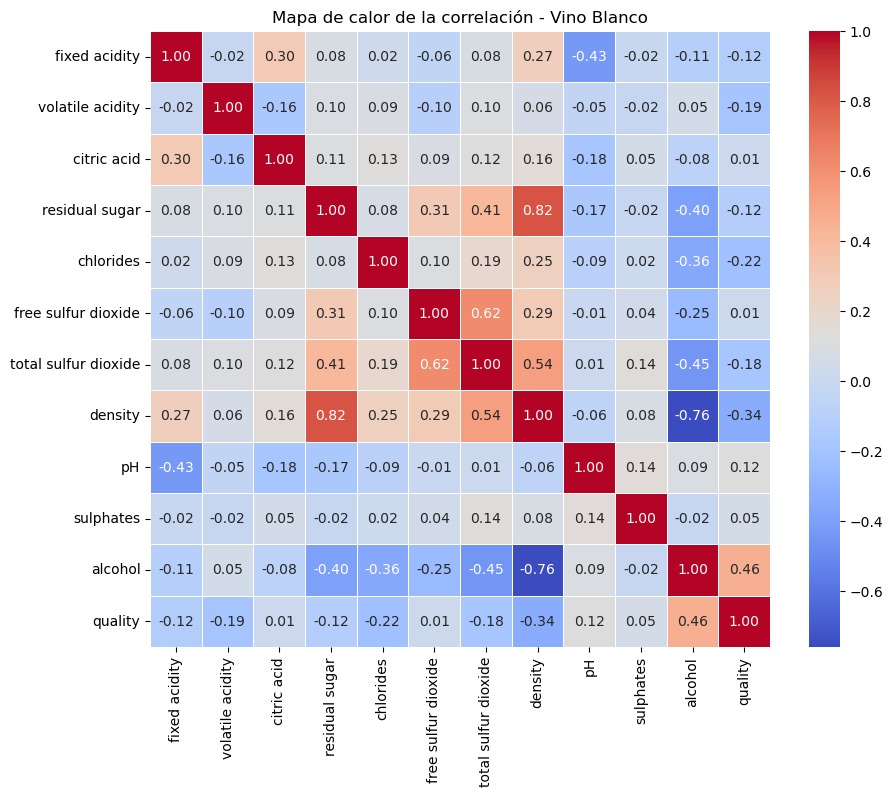

In [90]:
# Paso 3: Visualizaciones multivariadas
# Matriz de correlación y mapa de calor
correlation_matrix = white_wine_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de la correlación - Vino Blanco")
plt.show()

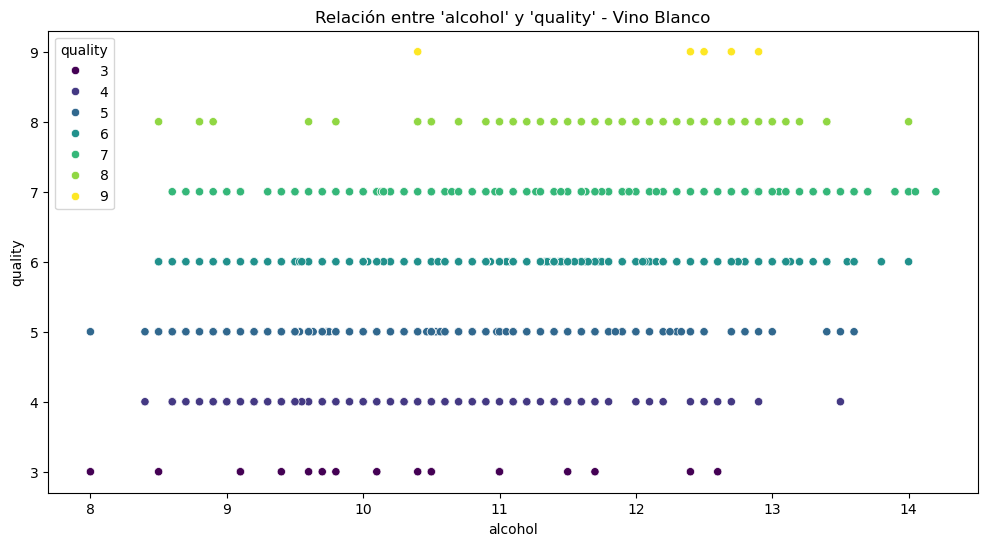

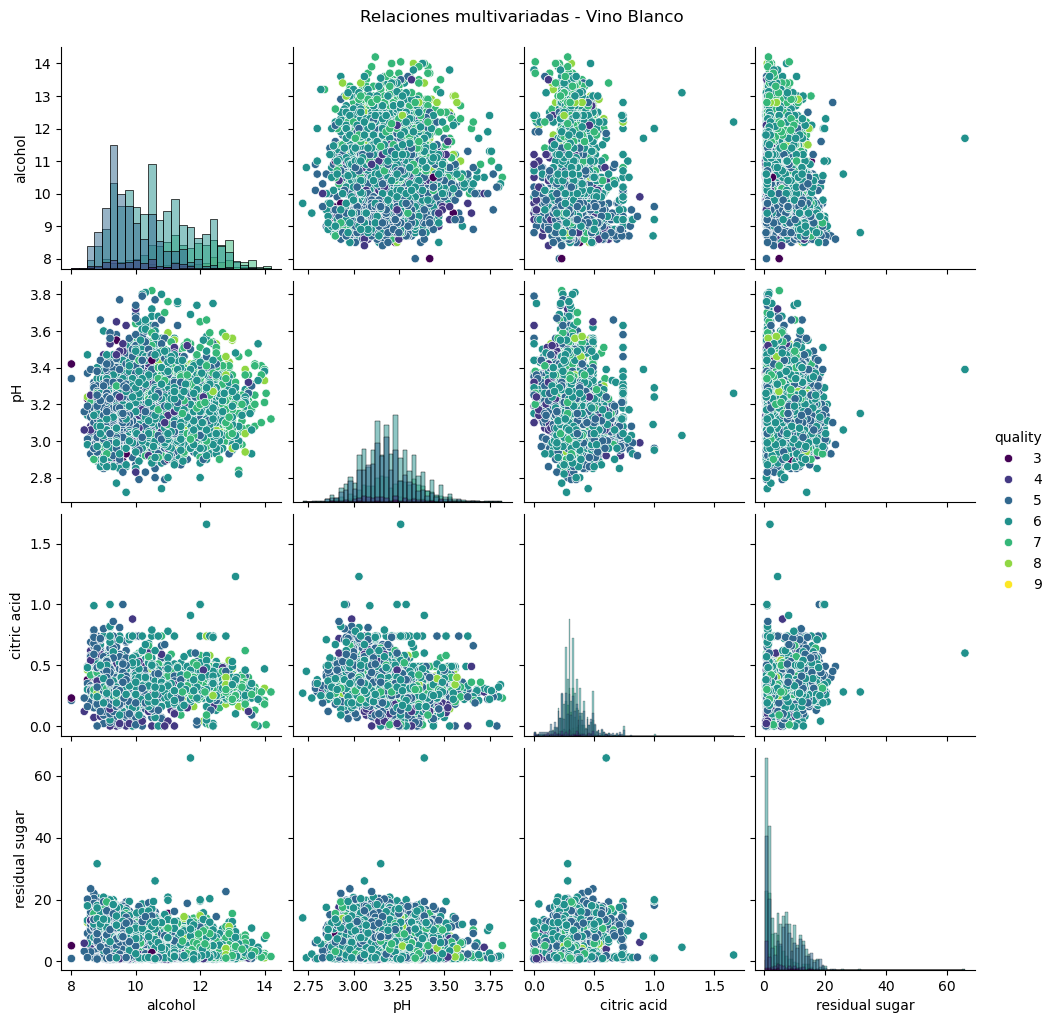

In [92]:
# Diagramas de dispersión entre variables clave
plt.figure(figsize=(12, 6))
sns.scatterplot(data=white_wine_cleaned, x="alcohol", y="quality", hue="quality", palette="viridis")
plt.title("Relación entre 'alcohol' y 'quality' - Vino Blanco")
plt.show()

sns.pairplot(
    white_wine_cleaned,
    vars=["alcohol", "pH", "citric acid", "residual sugar"],
    hue="quality",
    palette="viridis",
    diag_kind="hist",
)
plt.suptitle("Relaciones multivariadas - Vino Blanco", y=1.02)
plt.show()

3. Implementación de Modelos:
* Modelos de Clasificación: Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).

* Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.

* Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [93]:
# Paso 1: Preparar los datos
# Definir variable objetivo y características predictoras
X = white_wine_cleaned.drop("quality", axis=1)
y = white_wine_cleaned["quality"].astype("int")  # Asegurarse de que sea numérica para sklearn

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [94]:
# Paso 2: Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

print("\nEvaluación de Logistic Regression:")
print(classification_report(y_test, y_pred_logistic, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))


Evaluación de Logistic Regression:
              precision    recall  f1-score   support

           3       0.01      0.17      0.02         6
           4       0.17      0.50      0.25        46
           5       0.52      0.45      0.48       353
           6       0.60      0.25      0.35       537
           7       0.29      0.25      0.27       207
           8       0.12      0.64      0.20        39
           9       0.03      1.00      0.06         1

    accuracy                           0.33      1189
   macro avg       0.25      0.47      0.23      1189
weighted avg       0.48      0.33      0.36      1189

Accuracy: 0.3313708999158957


In [95]:
# Paso 3: KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("\nEvaluación de KNN:")
print(classification_report(y_test, y_pred_knn, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))



Evaluación de KNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.30      0.13      0.18        46
           5       0.51      0.57      0.54       353
           6       0.54      0.62      0.58       537
           7       0.42      0.32      0.37       207
           8       0.33      0.03      0.05        39
           9       0.00      0.00      0.00         1

    accuracy                           0.51      1189
   macro avg       0.30      0.24      0.24      1189
weighted avg       0.49      0.51      0.49      1189

Accuracy: 0.5121951219512195


In [96]:
# Paso 4: Comparar modelos
print("\nMatriz de confusión para Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logistic))

print("\nMatriz de confusión para KNN:")
print(confusion_matrix(y_test, y_pred_knn))


Matriz de confusión para Logistic Regression:
[[  1   1   0   1   0   0   3]
 [  7  23   6   4   4   2   0]
 [ 42  62 159  46  28  10   6]
 [ 47  49 125 133  90  85   8]
 [  8   4  12  38  52  83  10]
 [  0   0   3   1   7  25   3]
 [  0   0   0   0   0   0   1]]

Matriz de confusión para KNN:
[[  0   2   3   1   0   0   0]
 [  0   6  25  12   3   0   0]
 [  0  10 201 125  17   0   0]
 [  0   2 148 334  52   1   0]
 [  0   0  15 124  67   1   0]
 [  0   0   1  18  19   1   0]
 [  0   0   0   0   1   0   0]]


**Comparación**

In [97]:

# Resultados de winequality-red.csv
results_red = {
    "Logistic Regression": {
        "accuracy": 0.453,
        "precision": 0.57,  # Weighted avg de precision
        "recall": 0.45,     # Weighted avg de recall
        "f1-score": 0.49,   # Weighted avg de f1-score
    },
    "KNN": {
        "accuracy": 0.554,
        "precision": 0.53,  # Weighted avg de precision
        "recall": 0.55,     # Weighted avg de recall
        "f1-score": 0.54,   # Weighted avg de f1-score
    },
}

# Resultados de winequality-white.csv
results_white = {
    "Logistic Regression": {
        "accuracy": 0.331,
        "precision": 0.48,  # Weighted avg de precision
        "recall": 0.33,     # Weighted avg de recall
        "f1-score": 0.36,   # Weighted avg de f1-score
    },
    "KNN": {
        "accuracy": 0.512,
        "precision": 0.49,  # Weighted avg de precision
        "recall": 0.51,     # Weighted avg de recall
        "f1-score": 0.49,   # Weighted avg de f1-score
    },
}

# Convertir resultados en tablas
df_red = pd.DataFrame(results_red).T
df_white = pd.DataFrame(results_white).T

print("\nResultados para winequality-red.csv:")
print(df_red)

print("\nResultados para winequality-white.csv:")
print(df_white)

# Comparación
print("\nComparación de modelos para ambos datasets:")
comparison = pd.concat([df_red.add_suffix(" (red)"), df_white.add_suffix(" (white)")], axis=1)
print(comparison)



Resultados para winequality-red.csv:
                     accuracy  precision  recall  f1-score
Logistic Regression     0.453       0.57    0.45      0.49
KNN                     0.554       0.53    0.55      0.54

Resultados para winequality-white.csv:
                     accuracy  precision  recall  f1-score
Logistic Regression     0.331       0.48    0.33      0.36
KNN                     0.512       0.49    0.51      0.49

Comparación de modelos para ambos datasets:
                     accuracy (red)  precision (red)  recall (red)  \
Logistic Regression           0.453             0.57          0.45   
KNN                           0.554             0.53          0.55   

                     f1-score (red)  accuracy (white)  precision (white)  \
Logistic Regression            0.49             0.331               0.48   
KNN                            0.54             0.512               0.49   

                     recall (white)  f1-score (white)  
Logistic Regression        

**Conlusión:** En ambos datasets (winequality-red.csv y winequality-white.csv), el modelo de K-Nearest Neighbors (KNN) mostró un mejor rendimiento que Logistic Regression en todas las métricas clave: accuracy, precision, recall y f1-score.

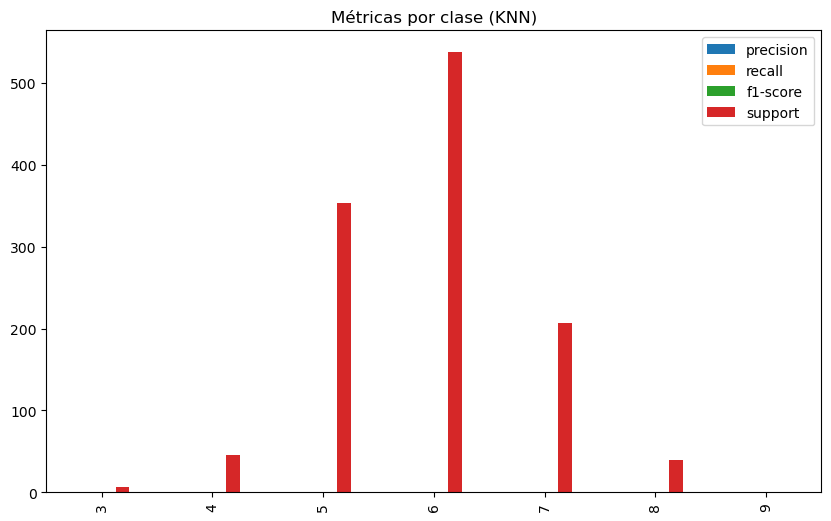

In [ ]:
# Vsiualizacion para identificar posibles sesgos
report = classification_report(y_test, y_pred_knn, output_dict=True, zero_division=0)
metrics_df = pd.DataFrame(report).transpose()

metrics_df.iloc[:-3, :].plot(kind="bar", figsize=(10, 6))
plt.title("Métricas por clase (KNN)")
plt.show()

**Optimización de modelos**

In [130]:
from sklearn.utils.class_weight import compute_class_weight
# Calcular pesos personalizados
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Entrenar Random Forest con pesos personalizados
rf_model_weighted = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
rf_model_weighted.fit(X_train_scaled, y_train)

# Evaluar el modelo ponderado
y_pred_rf_weighted = rf_model_weighted.predict(X_test_scaled)
print("Evaluación del modelo Random Forest (con class_weight personalizado):")
print(classification_report(y_test, y_pred_rf_weighted, zero_division=0))

Evaluación del modelo Random Forest (con class_weight personalizado):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.67      0.13      0.22        46
           5       0.59      0.56      0.58       353
           6       0.54      0.73      0.62       537
           7       0.53      0.28      0.37       207
           8       0.67      0.05      0.10        39
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1189
   macro avg       0.43      0.25      0.27      1189
weighted avg       0.56      0.55      0.53      1189



In [132]:
# Restar el valor mínimo de las clases para que comiencen desde 0
y_train_renumbered = y_train - y_train.min()
y_test_renumbered = y_test - y_train.min()


In [134]:
xgb_model_tuned = XGBClassifier(random_state=42, max_depth=4, learning_rate=0.1, n_estimators=100)
xgb_model_tuned.fit(X_train_scaled, y_train_renumbered)

# Evaluar el modelo ajustado
y_pred_xgb_tuned = xgb_model_tuned.predict(X_test_scaled)
y_pred_xgb_original = y_pred_xgb_tuned + y_train.min()
print("Evaluación del modelo Gradient Boosting ajustado:")
print(classification_report(y_test, y_pred_xgb_original, zero_division=0))


Evaluación del modelo Gradient Boosting ajustado:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.56      0.20      0.29        46
           5       0.58      0.56      0.57       353
           6       0.54      0.70      0.61       537
           7       0.47      0.30      0.37       207
           8       0.25      0.03      0.05        39
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1189
   macro avg       0.34      0.26      0.27      1189
weighted avg       0.53      0.54      0.52      1189



In [137]:
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Submuestrear para balancear los datos
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_scaled, y_train)

# Renumerar las clases balanceadas para que comiencen en 0
y_train_balanced_renumbered = y_train_balanced - y_train_balanced.min()

# Entrenar el modelo con las clases renumeradas
xgb_model_balanced = XGBClassifier(random_state=42, max_depth=4, learning_rate=0.1, n_estimators=100)
xgb_model_balanced.fit(X_train_balanced, y_train_balanced_renumbered)

# Evaluar el modelo
y_pred_xgb_balanced = xgb_model_balanced.predict(X_test_scaled)

# Volver a mapear las predicciones a las clases originales
y_pred_xgb_original = y_pred_xgb_balanced + y_train_balanced.min()

# Reporte de clasificación
print("Evaluación del modelo XGBoost con Submuestreo:")
print(classification_report(y_test, y_pred_xgb_original, zero_division=0))


Evaluación del modelo XGBoost con Submuestreo:
              precision    recall  f1-score   support

           3       0.00      0.17      0.01         6
           4       0.04      0.13      0.06        46
           5       0.44      0.33      0.38       353
           6       0.51      0.14      0.22       537
           7       0.32      0.13      0.19       207
           8       0.11      0.23      0.15        39
           9       0.01      1.00      0.01         1

    accuracy                           0.20      1189
   macro avg       0.20      0.30      0.14      1189
weighted avg       0.42      0.20      0.25      1189



In [ ]:

xgb_model_best = XGBClassifier(
    random_state=42,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100
)

xgb_model_best.fit(X_train_scaled, y_train_renumbered)

# Predecir en el conjunto de prueba
y_pred_best = xgb_model_best.predict(X_test_scaled)

# Volver a mapear las etiquetas predichas a las originales
y_pred_original = y_pred_best + y_train.min()

# Evaluar el modelo
from sklearn.metrics import classification_report
print("Evaluación del modelo ajustado con los mejores parámetros:")
print(classification_report(y_test, y_pred_original, zero_division=0))


Evaluación del modelo ajustado con los mejores parámetros:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.59      0.22      0.32        46
           5       0.58      0.56      0.57       353
           6       0.54      0.69      0.61       537
           7       0.45      0.31      0.37       207
           8       0.33      0.03      0.05        39
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1189
   macro avg       0.36      0.26      0.27      1189
weighted avg       0.53      0.54      0.52      1189



Conclusión final :El modelo de Random Forest con pesos personalizados obtuvo el mejor balance entre precisión y cobertura general, con un weighted F1-Score de 0.55, destacándose frente a los modelos de XGBoost. Sin embargo, XGBoost ajustado con los mejores parámetros también ofreció resultados competitivos, demostrando su capacidad para adaptarse a problemas complejos.